# Proyecto de object detection: conducción autónoma


# 1. Utilizando un dataset de object detection: Importando el dataset de conducción autónoma.

In [ ]:
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pathlib
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 75295, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 75295 (delta 63), reused 109 (delta 49), pack-reused 75161
Receiving objects: 100% (75295/75295), 580.61 MiB | 20.27 MiB/s, done.
Resolving deltas: 100% (53404/53404), done.


In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1694828 sha256=70aa880611a8273506b079c512aadb861dc9a9e7b85014d9848f45ea0380ec2b
  Stored in directory: /tmp/pip-ephem-wheel-cache-6l9ir2l9/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=0fcee37f50057ab502247fcf4fb994c8e49382d2abf47113a06564241a1e4c97
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=736d7f7bbbaa7aa5bb4abd423070f3231442226f06d5989d7bd80eafcb5b26da
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for avro-python3: filename=avro_p

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.13 requires dill>=0.3.5.1, but you have dill 0.3.1.1 which is incompatible.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.1.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,

In [ ]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 22 kB/s 
     |████████████████████████████████| 463 kB 30.9 MB/s 
     |████████████████████████████████| 1.3 MB 61.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    Uninstalling tensorflow-2.9.1:
      Successfully uninstalled tensorflow-2.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.9.2 req

In [ ]:
from object_detection.utils import visualization_utils as viz_utils

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Platzi/object_detection_cars_dataset_platzi_more_classes.zip'

Streaming output truncated to the last 5000 lines.
  inflating: images/1479502279230178611.jpg  
  inflating: images/1479502279730506173.jpg  
  inflating: images/1479502280230536426.jpg  
  inflating: images/1479502280730839737.jpg  
  inflating: images/1479502281729824146.jpg  
  inflating: images/1479502282229848985.jpg  
  inflating: images/1479502282730102580.jpg  
  inflating: images/1479502283731724690.jpg  
  inflating: images/1479502284232432719.jpg  
  inflating: images/1479502285221790200.jpg  
  inflating: images/1479502285730163274.jpg  
  inflating: images/1479502286231098378.jpg  
  inflating: images/1479502287230097438.jpg  
  inflating: images/1479502287730246905.jpg  
  inflating: images/1479502288231261057.jpg  
  inflating: images/1479502288731301852.jpg  
  inflating: images/1479502289730529475.jpg  
  inflating: images/1479502290232668314.jpg  
  inflating: images/1479502291230742118.jpg  
  inflating: images/1479502292231318149.jpg  
  inflating: images/147950229

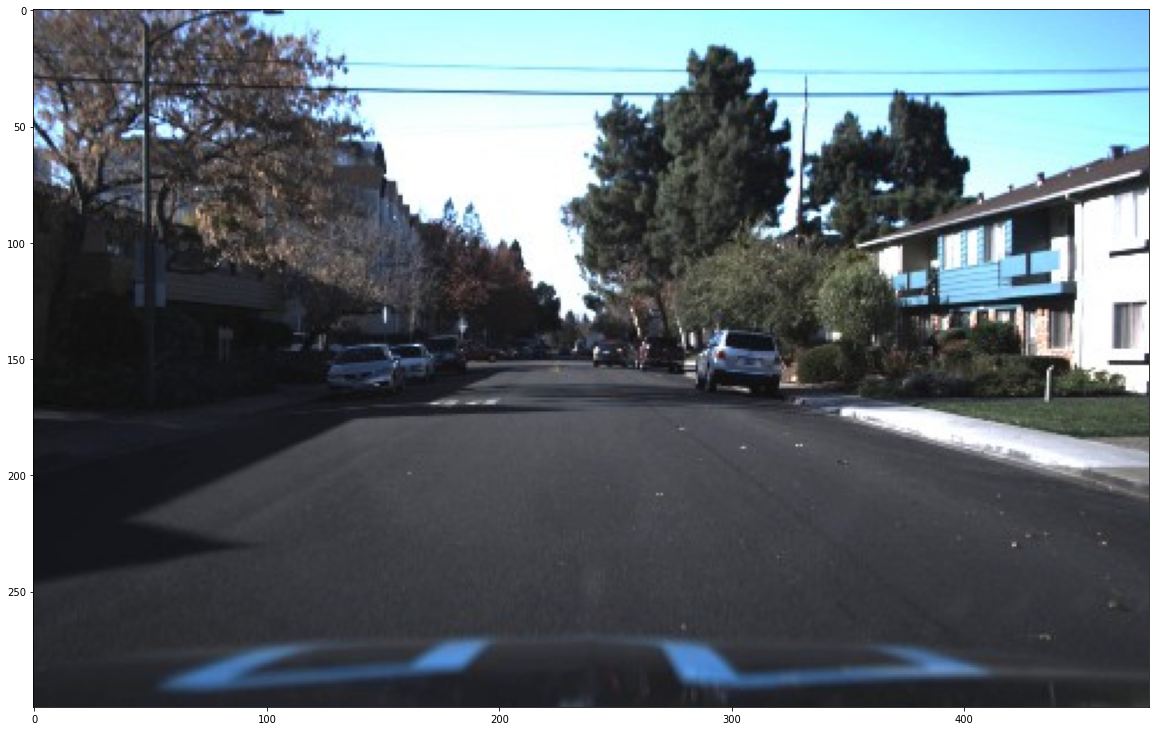

In [ ]:
%matplotlib inline
plt.figure(figsize=(20, 20))
img = cv2.imread('images/1479506176491553178.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# 2. Utilizando un dataset de object detection: visualización del dataset de conducción autónoma

In [ ]:
df = pd.read_csv('labels_train.csv')
df

frame  xmin  xmax  ymin  ymax  class_id
0       1478019952686311006.jpg   237   251   143   155         1
1       1478019952686311006.jpg   437   454   120   186         3
2       1478019953180167674.jpg   218   231   146   158         1
3       1478019953689774621.jpg   171   182   141   154         2
4       1478019953689774621.jpg   179   191   144   155         1
...                         ...   ...   ...   ...   ...       ...
132401  1479506176491553178.jpg   166   186   139   156         1
132402  1479506176491553178.jpg   182   204   142   153         1
132403  1479506176491553178.jpg   239   261   139   155         1
132404  1479506176491553178.jpg   259   280   139   157         1
132405  1479506176491553178.jpg   284   324   137   168         1

[132406 rows x 6 columns]

In [ ]:
print(img.shape)

(300, 480, 3)


In [ ]:
gt_boxes={}
for index, row in df.iterrows():
  if row['class_id'] == 3:
    bbox = np.array([[row['ymin']/300, row['xmin']/480, row['ymax']/300, row['xmax']/480]], dtype=np.float32)
    if row['frame'] in gt_boxes:
      gt_boxes[row['frame']] = np.append(gt_boxes[row['frame']], np.array(bbox), axis =0)
    else:
      gt_boxes[row['frame']] = np.array(bbox)

In [ ]:
my_path = 'images/'
train_images_np = []

for image in gt_boxes.keys():
  im = cv2.imread(my_path + image)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  train_images_np.append(im)

In [ ]:
pedestrain_class_id = 1
num_classes = 1

category_index = {
    num_classes: {
        'id' : pedestrain_class_id,
        'name': 'pedestrian'
    }
}

# 3. Utilizando un dataset de object detection: visualización final

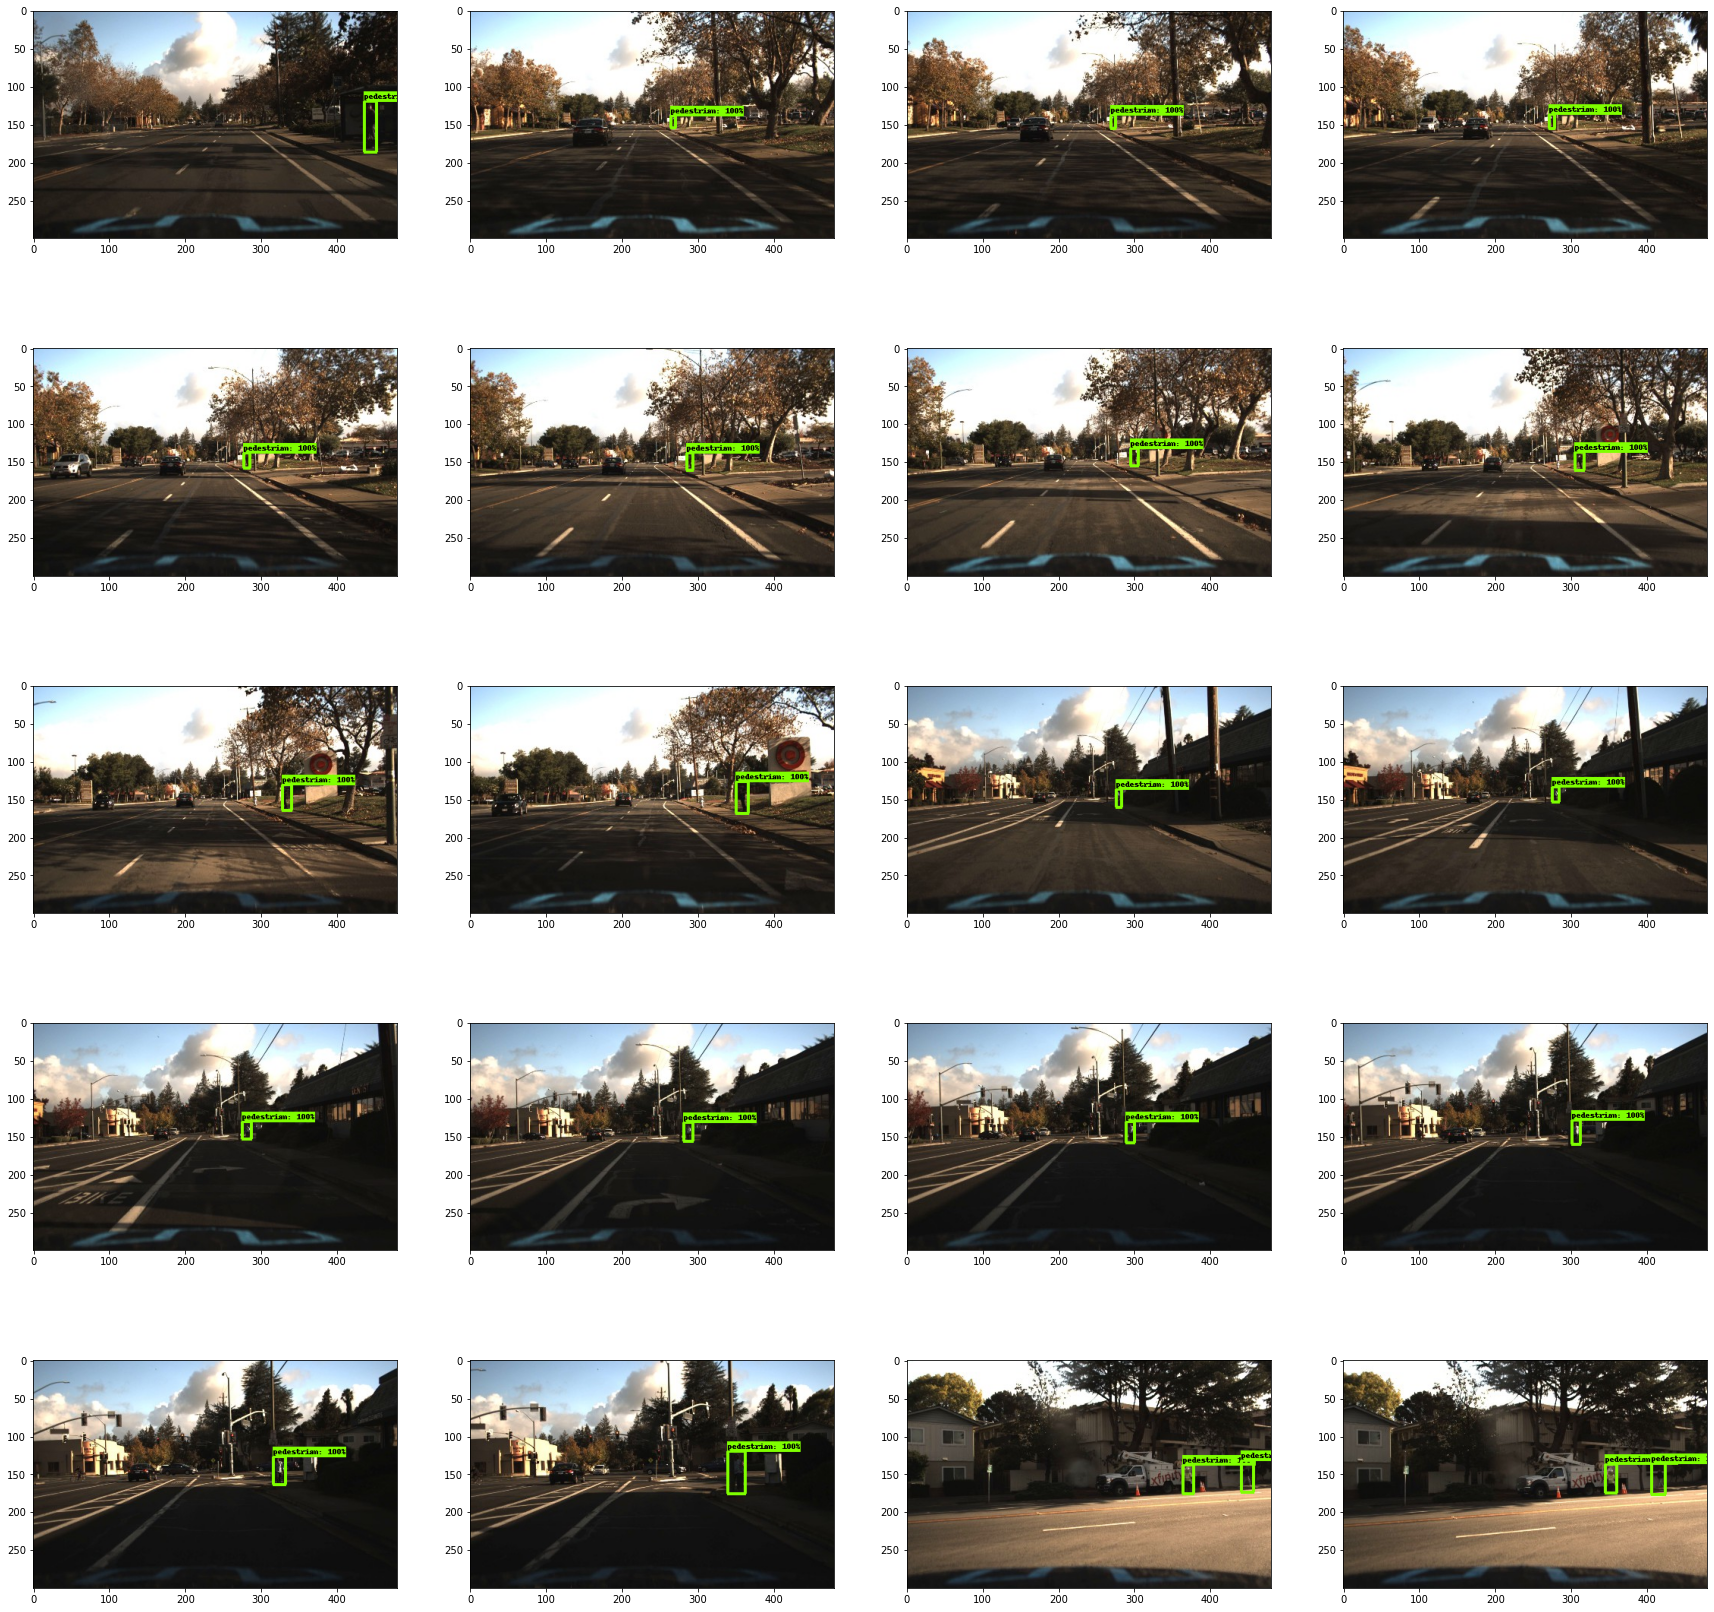

In [ ]:
def plot_detections(image_np, boxes, classes, scores, category_index):
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.5
  )
  plt.imshow(image_np_with_annotations)

plt.figure(figsize=(30, 30))
for idx in range(0, 20):
  bboxes = list(gt_boxes.values())[idx]
  dummy_scores = np.ones(shape=[bboxes.shape[0]], dtype=np.float32)
  plt.subplot(5, 4, idx+1)
  plot_detections(
      train_images_np[idx],
      bboxes,
      np.ones(shape=[bboxes.shape[0]], dtype=np.int32),
      dummy_scores,
      category_index
  )

plt.show()

# Aumentado de datos con Albumentations

In [ ]:
!pip install albumentations==1.2.0

In [ ]:
import albumentations as A

In [ ]:
transforms = A.Compose([
                        A.HorizontalFlip(p=0.8),
                        A.RandomBrightnessContrast(p=0.8)
], bbox_params=A.BboxParams(format='albumentations'))

In [ ]:
plt.figure()
plt.imshow(train_images_np[0])

In [ ]:
bbox = list(gt_boxes.values())[0][0]
print(bbox)

In [ ]:
bbox = [bbox[1], bbox[0], bbox[3], bbox[2]]

In [ ]:
bbox.append('pedestrian')

In [ ]:
bbox = [bbox]

In [ ]:
trasformed_image_1 = transforms(image=train_images_np[0], bboxes=bbox)
trasformed_image_2 = transforms(image=train_images_np[0], bboxes=bbox)
trasformed_image_3 = transforms(image=train_images_np[0], bboxes=bbox)

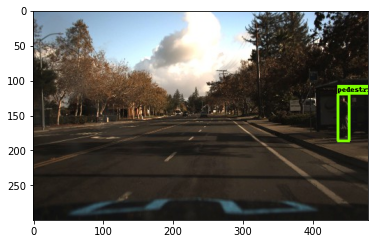

In [ ]:
plt.figure()

plot_detections(
    train_images_np[0],
    np.array([list(gt_boxes.values())[0][0]]),
    np.ones(shape=[1], dtype=np.int32),
    dummy_scores,
    category_index
)

In [ ]:
transformed_bbox_1 = (list(trasformed_image_1['bboxes'][0])[:-1])

In [ ]:
transformed_bbox_1 = [transformed_bbox_1[1], transformed_bbox_1[0], transformed_bbox_1[3], transformed_bbox_1[2]]

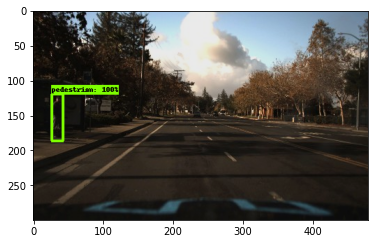

In [ ]:
plt.figure()
plot_detections(
    trasformed_image_1['image'],
    np.array([transformed_bbox_1]),
    np.ones(shape=[1], dtype=np.int32),
    dummy_scores,
    category_index
)

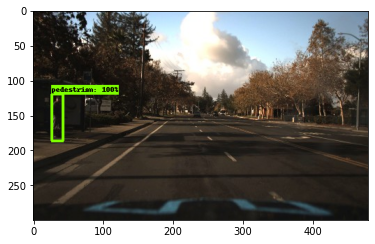

In [ ]:
transformed_bbox_2 = (list(trasformed_image_2['bboxes'][0])[:-1])
transformed_bbox_2 = [transformed_bbox_2[1], transformed_bbox_2[0], transformed_bbox_2[3], transformed_bbox_2[2]]
plt.figure()
plot_detections(
    trasformed_image_2['image'],
    np.array([transformed_bbox_2]),
    np.ones(shape=[1], dtype=np.int32),
    dummy_scores,
    category_index
)

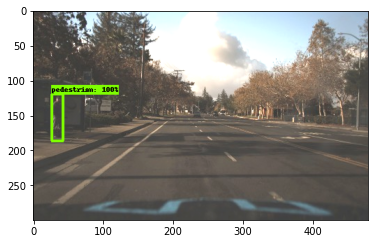

In [ ]:
transformed_bbox_3 = (list(trasformed_image_3['bboxes'][0])[:-1])
transformed_bbox_3 = [transformed_bbox_3[1], transformed_bbox_3[0], transformed_bbox_3[3], transformed_bbox_3[2]]
plt.figure()
plot_detections(
    trasformed_image_3['image'],
    np.array([transformed_bbox_3]),
    np.ones(shape=[1], dtype=np.int32),
    dummy_scores,
    category_index
)

# 5. Utilizando un modelo de object detection pre-entrenado.

In [ ]:
!wget  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint models/research/object_detection/test_data/

--2022-07-15 14:19:06--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.63.128, 2607:f8b0:4004:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.63.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   248MB/s    in 0.9s    

2022-07-15 14:19:07 (248 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



In [ ]:
from object_detection.utils import config_util
from object_detection.builders import model_builder

In [ ]:
model_name = 'ssd_resnet50_v1_fpn_640x640_coco17_tpu-8'
pipeline_config = os.path.join('models/research/object_detection/configs/tf2/' + model_name + '.config')
model_dir = 'models/research/object_detection/test_data/checkpoint/'

In [ ]:
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

In [ ]:
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(model_dir, 'ckpt-0')).expect_partial()

In [ ]:
def get_model_detection_function(model):

  @tf.function
  def detect_fn(image):
    image, shape = model.preprocess(image)
    prediction_dict = model.predict(image, shape)
    detections = model.postprocess(prediction_dict, shape)

    return detections

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

In [ ]:
from object_detection.utils import label_map_util

label_map_path = configs['eval_input_config'].label_map_path
label_map_path = 'models/research/object_detection/data/mscoco_label_map.pbtxt'

label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True
)

category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [ ]:
%matplotlib inline

img = cv2.imread('images/1479506176491553178.jpg')
image_np = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [ ]:
input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32
)
detections = detect_fn(input_tensor)

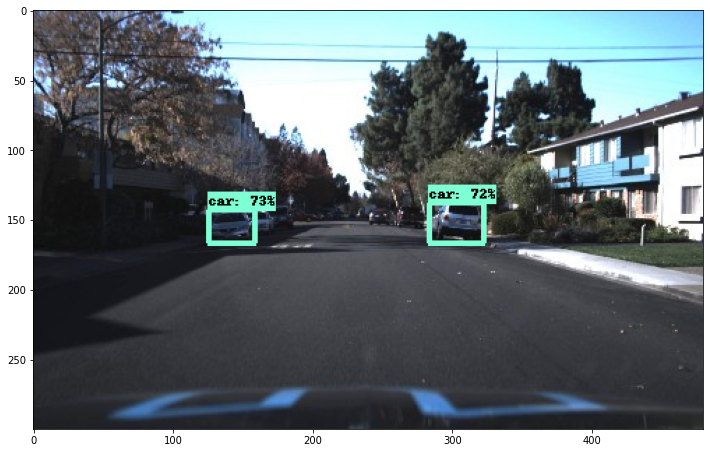

In [ ]:
label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'][0].numpy(),
    (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
    detections['detection_scores'][0].numpy(),
    category_index,
    use_normalized_coordinates=True,
    min_score_thresh=0.7
)

plt.figure(figsize=(12, 16))
plt.imshow(image_np_with_detections)
plt.show()

# 6. Fine-tuning en object detection

In [ ]:
from object_detection.utils import config_util
from object_detection.builders import model_builder


In [ ]:
num_classes = 1
pipeline_config = 'models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config'
checkpoint_path = 'models/research/object_detection/test_data/checkpoint/ckpt-0'

In [ ]:
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']


In [ ]:
model_config.ssd.num_classes = num_classes
model_config.ssd.freeze_batchnorm = True
detection_model = model_builder.build(model_config=model_config, is_training=True)

In [ ]:
fake_box_predictor = tf.compat.v2.train.Checkpoint(
    _base_tower_layers_for_heads = detection_model._box_predictor._base_tower_layers_for_heads,
    _box_prediction_head=detection_model._box_predictor._box_prediction_head
)

In [ ]:
fake_model = tf.compat.v2.train.Checkpoint(
    _feature_extractor=detection_model.feature_extractor,
    _box_predictor=fake_box_predictor
)

In [ ]:
ckpt = tf.compat.v2.train.Checkpoint(model=fake_model)

In [ ]:
ckpt.restore(checkpoint_path).expect_partial()

In [ ]:
image, shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))

In [ ]:
prediction_dict = detection_model.predict(image, shapes)

In [ ]:
_ = detection_model.postprocess(prediction_dict, shapes)

In [ ]:
df = pd.read_csv('labels_train.csv')
df

frame  xmin  xmax  ymin  ymax  class_id
0       1478019952686311006.jpg   237   251   143   155         1
1       1478019952686311006.jpg   437   454   120   186         3
2       1478019953180167674.jpg   218   231   146   158         1
3       1478019953689774621.jpg   171   182   141   154         2
4       1478019953689774621.jpg   179   191   144   155         1
...                         ...   ...   ...   ...   ...       ...
132401  1479506176491553178.jpg   166   186   139   156         1
132402  1479506176491553178.jpg   182   204   142   153         1
132403  1479506176491553178.jpg   239   261   139   155         1
132404  1479506176491553178.jpg   259   280   139   157         1
132405  1479506176491553178.jpg   284   324   137   168         1

[132406 rows x 6 columns]

In [ ]:
gt_boxes = []
images_added = []
images_multi_bbox = set()

for index, row in df.iterrows():
  if row['frame'] not in images_added and row['class_id'] == 3:
    images_added.append(row['frame'])
    bbox = np.array([[row['ymin']/300, row['xmin']/480, row['ymax']/300, row['xmax']/480]], dtype=np.float32)
    gt_boxes.append(bbox)
  else:
    images_multi_bbox.add(row['frame'])



In [ ]:
id_x_to_delete = []
for x, image in enumerate(images_added):
  if image in images_multi_bbox:
    id_x_to_delete.append(x)

In [ ]:
new_gt_boxes = []
new_images_added = []
for x, gt_box in enumerate(gt_boxes):
  if x not in  id_x_to_delete:
    new_gt_boxes.append(gt_box)


In [ ]:
for x, image_added in enumerate(images_added):
  if x not in id_x_to_delete:
    new_images_added.append(image_added)

In [ ]:
gt_boxes = new_gt_boxes
images_added = new_images_added

In [ ]:
my_path = 'images/'
train_images_np = []
print(len(images_added))
for image in images_added:
  im = cv2.imread(my_path+ image)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  train_images_np.append(im)

21


In [ ]:
label_id_offset = 1
train_image_tensors = []
gt_classes_one_hot_tensors = []
gt_box_tensors = []
for (train_image_np, gt_box_np) in zip(train_images_np, gt_boxes):
  train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(train_image_np, dtype=tf.float32), axis=0))
  gt_box_tensors.append(tf.convert_to_tensor(gt_box_np, dtype=tf.float32))
  zero_indexed_ground_truth_classes = tf.convert_to_tensor(np.ones([gt_box_np.shape[0]], dtype=np.int32)-label_id_offset)
  gt_classes_one_hot_tensors.append(tf.one_hot(zero_indexed_ground_truth_classes, num_classes))

In [ ]:
print(len(train_image_tensors))

21


In [ ]:
tf.keras.backend.set_learning_phase(True)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:414: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
batch_size = 10
learning_rate= 0.01
num_batches = 200

In [ ]:
trainable_variables = detection_model.trainable_variables
to_fine_tune = []
prefixes_to_train = [
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead',
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead'
]


for var in trainable_variables:
  if any([var.name.startswith(prefix) for prefix in prefixes_to_train]):
    to_fine_tune.append(var)

In [ ]:
def get_model_train_step_function(model, optimizer, vars_to_fine_tune):

  @tf.function
  def train_step_fn(image_tensors,
                    groundtruth_boxes_list,
                    groundtruth_classes_list):
    shapes = tf.constant(batch_size * [[640, 640, 3]], dtype=tf.int32)
    model.provide_groundtruth(
        groundtruth_boxes_list=groundtruth_boxes_list,
        groundtruth_classes_list=groundtruth_classes_list
    )

    with tf.GradientTape() as tape:
      preprocessed_images = tf.concat(
          [detection_model.preprocess(image_tensor)[0]
          for image_tensor in image_tensors], axis=0
      )
      prediction_dict = model.predict(preprocessed_images, shapes)
      losses_dict = model.loss(prediction_dict, shapes)
      total_loss = losses_dict['Loss/localization_loss'] + losses_dict['Loss/classification_loss']
      gradients = tape.gradient(total_loss, vars_to_fine_tune)
      optimizer.apply_gradients(zip(gradients, vars_to_fine_tune))

    return total_loss

  return train_step_fn

In [ ]:
optimizer= tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
train_step_fn = get_model_train_step_function(detection_model, optimizer, to_fine_tune)

In [ ]:
def process_data_augmentation(image_list, image_tensors, gt_boxes_list):
  new_train_image_tensors = []
  new_gt_box_tensors = []
  for x, image in enumerate(image_list):
    bbox = [gt_boxes_list[x].numpy()[0][1], gt_boxes_list[x].numpy()[0][0], gt_boxes_list[x].numpy()[0][3], gt_boxes_list[x].numpy()[0][2]]
    bbox.append('pedestrian')
    bbox = [bbox]

    transformed_image_1 = transforms(image=image, bboxes=bbox)
    transformed_bbox = (list(transformed_image_1['bboxes'][0])[:-1])
    transformed_bbox = [transformed_bbox[1], transformed_bbox[0], transformed_bbox[3], transformed_bbox[2]]
    gt_boxes_list[x] = transformed_bbox
    new_train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(transformed_image_1['image'], dtype =tf.float32), axis=0))
    transformed_bbox = np.array([transformed_bbox])
    new_gt_box_tensors.append(tf.convert_to_tensor(transformed_bbox, dtype=tf.float32))

  return new_train_image_tensors, new_gt_box_tensors


In [ ]:
for idx in range(num_batches):
  all_keys = list(range(len(train_images_np)))
  random.shuffle(all_keys)
  example_keys = all_keys[:batch_size]


  gt_boxes_list = [gt_box_tensors[key] for key in example_keys]
  gt_classes_list = [gt_classes_one_hot_tensors[key] for key in example_keys]
  image_tensors = [train_image_tensors[key] for key in example_keys]
  image_list = [train_images_np[key] for key in example_keys]

  new_train_image_tensors, new_gt_box_tensors = process_data_augmentation(image_list, image_tensors, gt_boxes_list)

  images_tensors = new_train_image_tensors
  gt_boxes_list = new_gt_box_tensors

  total_loss = train_step_fn(images_tensors, gt_boxes_list, gt_classes_list)

  if idx % 10 == 0:
    print('batch ' + str(idx) + ' of ' + str(num_batches) + ', loss= ' + str(total_loss), flush=True)






batch 0 of 200, loss= tf.Tensor(1.553026, shape=(), dtype=float32)
batch 10 of 200, loss= tf.Tensor(1.4763542, shape=(), dtype=float32)
batch 20 of 200, loss= tf.Tensor(1.0383756, shape=(), dtype=float32)
batch 30 of 200, loss= tf.Tensor(1.3558499, shape=(), dtype=float32)
batch 40 of 200, loss= tf.Tensor(1.8369408, shape=(), dtype=float32)
batch 50 of 200, loss= tf.Tensor(0.3911224, shape=(), dtype=float32)
batch 60 of 200, loss= tf.Tensor(0.17984873, shape=(), dtype=float32)
batch 70 of 200, loss= tf.Tensor(0.30360842, shape=(), dtype=float32)
batch 80 of 200, loss= tf.Tensor(1.5643122, shape=(), dtype=float32)
batch 90 of 200, loss= tf.Tensor(1.8147774, shape=(), dtype=float32)
batch 100 of 200, loss= tf.Tensor(12.546995, shape=(), dtype=float32)
batch 110 of 200, loss= tf.Tensor(9.308742, shape=(), dtype=float32)
batch 120 of 200, loss= tf.Tensor(2.2686443, shape=(), dtype=float32)
batch 130 of 200, loss= tf.Tensor(6.5075884, shape=(), dtype=float32)
batch 140 of 200, loss= tf.Tens

In [ ]:
def detect(input_tensor):
  preprocessed_image, shapes = detection_model.preprocess(input_tensor)
  predict_dict = detection_model.predict(preprocessed_image, shapes)
  return detection_model.postprocess(predict_dict, shapes)

In [ ]:
pedestrian_class_id = 1
num_classes = 1

category_index = {
    num_classes: {
        'id': pedestrian_class_id,
        'name': 'pedestrian'
    }
}

In [ ]:
img = cv2.imread('images/1478900584619750605.jpg')
image_np = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32
)

In [ ]:
detections = detect(input_tensor)

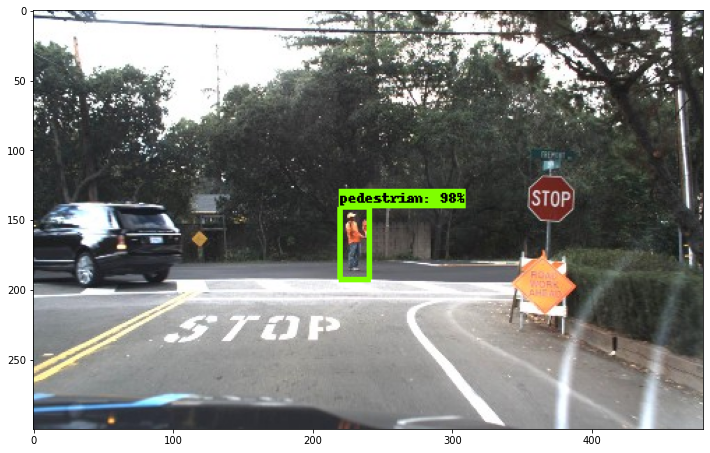

In [ ]:
label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'][0].numpy(),
    (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
    detections['detection_scores'][0].numpy(),
    category_index,
    use_normalized_coordinates=True,
    min_score_thresh=0.7
)

plt.figure(figsize=(12, 16))
plt.imshow(image_np_with_detections)
plt.show()